In [1]:
import cv2
import  numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.color import rgb2gray
from skimage.transform import warp
from skimage.registration import optical_flow_ilk
from skimage.io import imread
from skimage.transform import resize

#read all the frames
import os
frames = os.listdir('./frames')
# sort the frames in alphanumerical order
from natsort import natsorted
frames = natsorted(frames)

frame_0.jpg


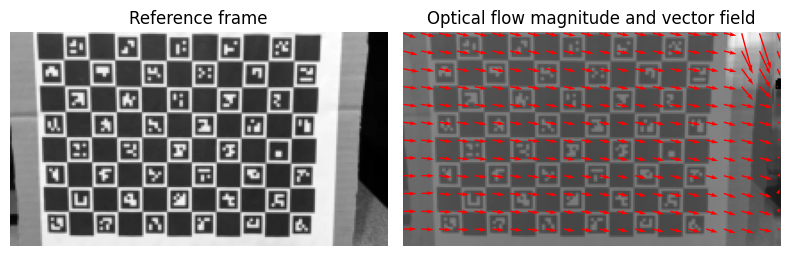

frame_32.jpg


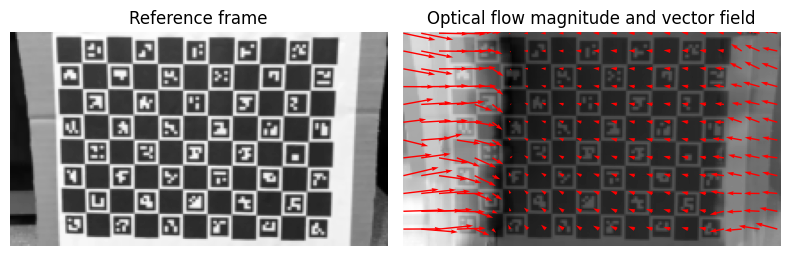

frame_64.jpg


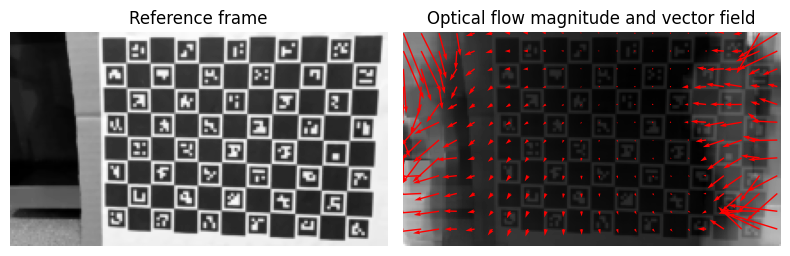

frame_96.jpg


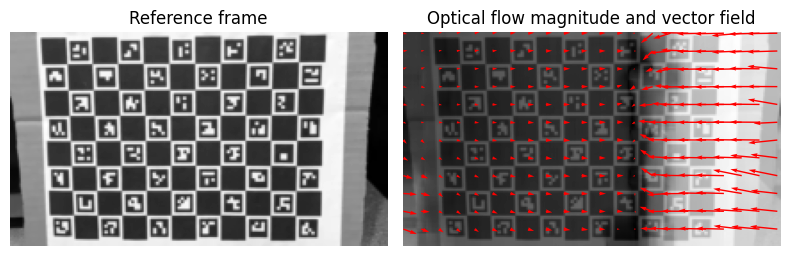

frame_128.jpg


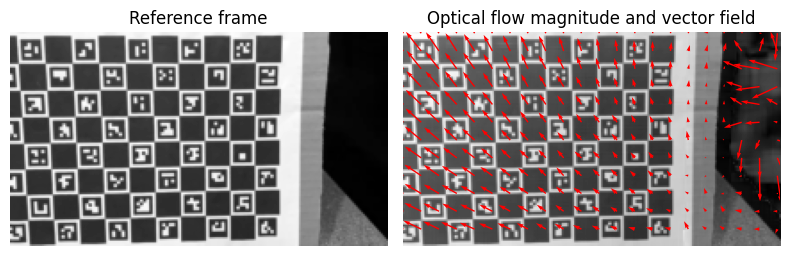

frame_160.jpg


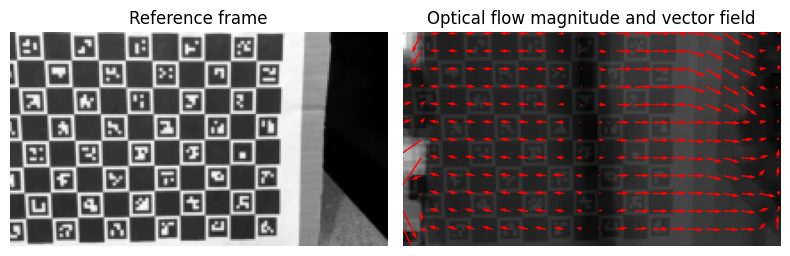

frame_192.jpg


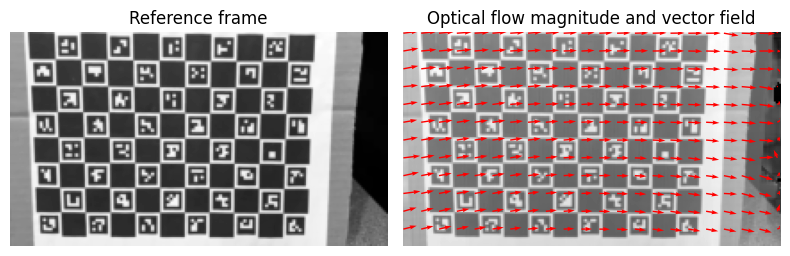

frame_224.jpg


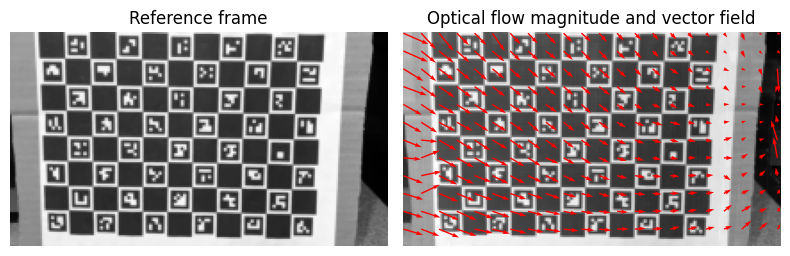

frame_256.jpg


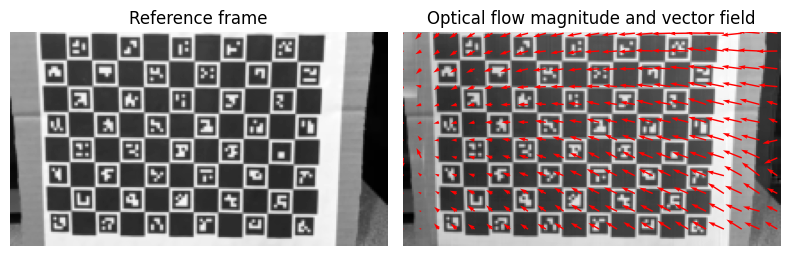

frame_288.jpg


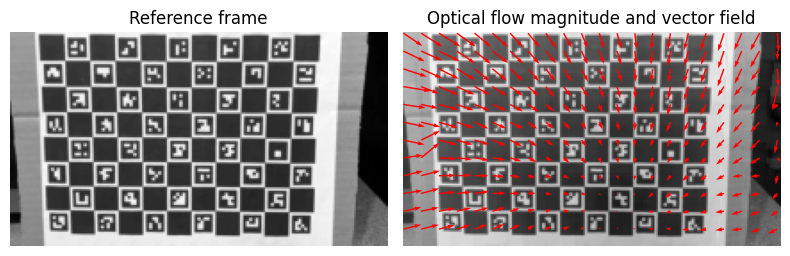

In [2]:
for i in range(0,len(frames)-32,32):
    print("frame_{}.jpg".format(i))
    # read the reference frame
    frame0 = imread('./frames/'+frames[i])
    # read the target frame
    frame1 = imread('./frames/'+frames[i+31])
    # Resize the frames to 1/4 of the original size
    frame0 = resize(frame0, (frame1.shape[0]//4, frame1.shape[1]//4))
    frame1 = resize(frame1, (frame1.shape[0]//4, frame1.shape[1]//4))
    # convert to grayscale
    frame0 = rgb2gray(frame0)
    frame1 = rgb2gray(frame1)
    # compute the optical flow
    v,u = optical_flow_ilk(frame0, frame1)
    # warp the target frame
    nr, nc = frame0.shape
    row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc), indexing='ij')
    frame1_warp = warp(frame1, np.array([row_coords + v, col_coords + u]), mode='edge')
    # compute flow magnitude
    norm = np.sqrt(v**2 + u**2)

    # Display

    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))

    #sequence image sample

    ax0.imshow(frame0, cmap='gray')
    ax0.set_title('Reference frame')
    ax0.set_axis_off()

    # Quiver plot arguments

    nvec=20 # number of vectors to plot
    nl, nc = frame0.shape
    step = max(nl//nvec, nc//nvec)

    y,x = np.mgrid[:nl:step, :nc:step]

    u_ = u[::step, ::step]
    v_ = v[::step, ::step]

    #overlay the optical flow on the reference frame
    ax1.imshow(frame0+0.1*norm, cmap='gray')
    ax1.quiver(x, y, u_, v_, color='r', units='dots', angles='xy', scale_units='xy', lw=3)
    ax1.set_title("Optical flow magnitude and vector field")
    ax1.set_axis_off()
    fig.tight_layout()
    plt.show()